# AI Lab 04

> 학번: 2017132006
>
> 이름: 공상민

---

In [3]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def softmax(a):
    if a.ndim >= 2:
        a = a.reshape( -1, a.shape[-1] )
        c = np.max( a, axis=1, keepdims=True )
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum( exp_a, axis=1, keepdims=True )
    else:
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a

    return y


### 손실 함수
___

In [4]:
# 4.1
def mse_loss(y_hat, y):
    return np.mean( ( y - y_hat )**2)

In [5]:
# 4.2
y = np.random.random(4)
y_hat = np.random.random(4)

print(y)
print(y_hat)
print('loss = ', mse_loss(y_hat,y))


[0.86310454 0.19773777 0.67091722 0.00562372]
[0.644917   0.16293068 0.36026467 0.18005139]
loss =  0.04393683805421014


In [6]:
# 4.3
y_hat[1:] = y[1:]
print(y)
print(y_hat)
print('loss = ', mse_loss(y_hat, y))


[0.86310454 0.19773777 0.67091722 0.00562372]
[0.644917   0.19773777 0.67091722 0.00562372]
loss =  0.01190145029033123


In [7]:
# 4.5
def ce_loss(y_hat, y):
    delta = 1e-7
    return - np.sum(y*np.log(y_hat + delta))


In [8]:
# 4.6
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
ce_loss( np.array(y_hat), np.array(y) )

0.510825457099338

In [9]:
# 4.7
y_hat = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
ce_loss(np.array(y_hat), np.array(y))

2.302584092994546

In [10]:
# 4.8 MNIST 데이터셋 로드

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.uint8)
y = y.astype(np.uint8)

# one-hot encoding
y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:
# 4.9
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]


In [12]:
# 4.10
np.random.choice(60000, 10)


array([52881, 29733, 32157,  9035, 28560, 30424, 42049, 21322,  4187,
        9465])

In [13]:
# 4.11 미니배치용 cross-entropy

def ce_loss( y_hat, y ):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return - np.sum( y * np.log(y_hat + 1e-7)) / batch_size

### 수치 미분
---

In [14]:
# 4.12
def num_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h


In [15]:
# 4.13
np.float32(1e-50)


0.0

In [16]:
# 4.15
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x


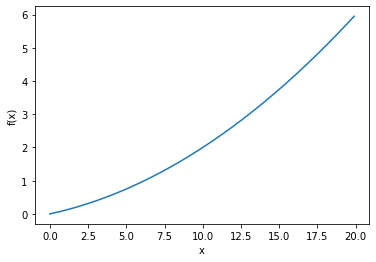

In [17]:
# 4.16

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [18]:
# 4.17
num_diff(function_1, 5)


0.20000099999917254

In [19]:
# 4.18
num_diff(function_1, 10)


0.3000009999976072

In [20]:
# 4.19
def function_2(x):
    return np.sum(x**2)


In [21]:
# 4.20
def function_temp1(x0):
    return x0 * x0 + 4.0 ** 2

num_diff(function_temp1, 3.0)


6.000099999994291

In [22]:
# 4.21
def function_temp2(x1):
    return 3.0 ** 2 + x1 * x1

num_diff(function_temp2, 4.0)


8.00009999998963

### 기울기
---

In [23]:
# 4.22

def num_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # x와 형상이 같고 원소가 모두 0인 배열 생성
    
    for idx in range(x.size):

        # 기존 x 값을 보관
        temp = x[idx]

        # f(x+h) 계산
        x[idx] = temp + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = temp - h
        fxh2 = f(x)
        
        # 그리고 기울기 계산
        grad[idx] = (fxh1 - fxh2) / (2*h)

        # 다시 x를 원래대로
        x[idx] = temp
        
    return grad


In [24]:
# 4.23
print( num_grad(function_2, np.array([3.0, 4.0])))


[6. 8.]


In [25]:
# 4.24
print(num_grad(function_2, np.array([0.0, 2.0])))


[0. 4.]


In [26]:
# 4.25
print(num_grad(function_2, np.array([3.0, 0.0])))


[6. 0.]


In [27]:
# 4.26
def gd(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = num_grad(f, x)
        x -= lr * grad

        plt.scatter(x[0], x[1])
    
    return x


[-6.11110793e-10  8.14814391e-10]


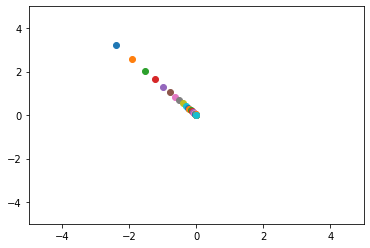

In [28]:
# 4.27
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

result = gd(function_2, init_x = init_x, lr = 0.1, step_num = 100)

print(result)

plt.show()

array([-2.58983747e+13, -1.29524862e+12])

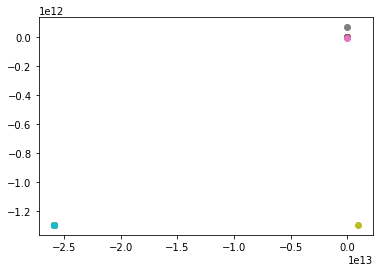

In [32]:
# 4.28
init_x = np.array([-3.0, 4.0])
gd(function_2, init_x = init_x, lr = 10.0, step_num = 100)


array([-2.99940006,  3.99920008])

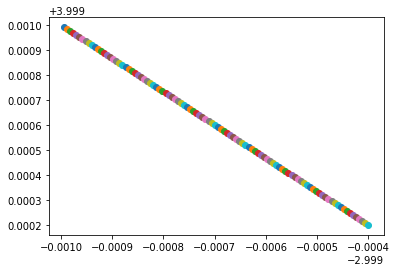

In [33]:
# 4.29
init_x = np.array([-3.0, 4.0])
gd(function_2, init_x, lr = 1e-6, step_num = 100)


In [35]:
# 4.30

class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return softmax( np.dot(x, self.W) )
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        loss = ce_loss(y_hat, y)
        
        return loss

    def num_grad(self, x, y):
        h = 1e-4
        grad = np.zeros_like( self.W )

        for idx, val in np.ndenumerate( self.W ):

            temp = self.W[idx]

            self.W[idx] = temp + h
            fxh1 = self.loss(x, y)

            self.W[idx] = temp - h
            fxh2 = self.loss(x, y)
            
            grad[idx] = (fxh1 - fxh2) / (2*h)

            self.W[idx] = temp
            
        return grad


In [36]:
# 4.31
net = SimpleNet()
print(net.W)


[[ 0.77685256 -0.11205545 -0.62941451]
 [ 0.18861156  0.84261584  0.46346687]]


In [37]:
# 4.32
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.38349285 0.40528075 0.2112264 ]


In [38]:
# 4.33
np.argmax(p)


1

In [39]:
# 4.34
y = np.array([0, 0, 1])
net.loss(x, y)


1.5548242755253787

In [40]:
# 4.35
dW = net.num_grad(x, y)
print(dW)


[[ 0.2300956   0.24316833 -0.47326394]
 [ 0.34514341  0.3647525  -0.70989591]]


### 학습 알고리즘
---

In [41]:
# 4.36

import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.astype(np.uint8) / 255
y = y.astype(np.uint8)

# one-hot encoding
y = np.eye(10)[y]

x_train = X[:60000]
x_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

    
def softmax(a):
    if a.ndim >= 2:
        a = a.reshape( -1, a.shape[-1] )
        c = np.max( a, axis=1, keepdims=True )
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum( exp_a, axis=1, keepdims=True )
    else:
        c = np.max(a)
        exp_a = np.exp(a - c)
        sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a

    return y


def ce_loss( y_hat, y ):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return - np.sum( y * np.log(y_hat + 1e-7)) / batch_size



(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [42]:
# 4.37

class TwoLayerNet:
    def __init__(self, i_size, h_size, o_size, init_std=0.01):
        self.params = {}
        self.params['W1'] = init_std * np.random.randn(i_size, h_size)
        self.params['b1'] = np.zeros(h_size)
        self.params['W2'] = init_std * np.random.randn(h_size, o_size)
        self.params['b2'] = np.zeros(o_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        return softmax(a2)
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return ce_loss( y_hat, y )
    
    def accuracy(self, x, y):
        y_hat = self.predict(x)
        y_hat = np.argmax(y_hat, axis=1)
        y = np.argmax(y, axis=1)
        accuracy = np.sum(y_hat == y) / float(x.shape[0])
        return accuracy
        
    def num_grad(self, x, y):
        h = 1e-4
        grads = {}

        for key in ('W1', 'b1', 'W2', 'b2'):
            w = self.params[key]
            grad = np.zeros_like( w )
        
            for idx, val in np.ndenumerate( w ):
                temp = w[idx]

                w[idx] = temp + h
                fxh1 = self.loss(x, y)
                w[idx] = temp - h
                fxh2 = self.loss(x, y)
                grad[idx] = (fxh1 - fxh2) / (2*h)

                w[idx] = temp
            
            grads[key] = grad

        return grads

In [43]:
# 4.38
net = TwoLayerNet(i_size = 784, h_size = 100, o_size = 10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [44]:
# 4.39
x = np.random.rand(10, 784)
y = net.predict(x)


In [45]:
# 4.40 (오래 걸림)
x = np.random.rand(10, 784)
y = np.random.rand(10, 10)

grads = net.num_grad(x, y)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [46]:
# 4.41
import numpy as np

train_loss_list = []

iters_num = 150
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

net = TwoLayerNet(i_size = 784, h_size = 50, o_size = 10)


In [47]:
# 4.42 (오래 걸림, 중간에 멈춰도 OK)
for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = net.num_grad(x_batch, y_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] -= learning_rate * grad[key]


    loss = net.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    print('loss: {}'.format(loss))

loss: 2.2903496767350355
loss: 2.2970612509295636
loss: 2.294259266388765
loss: 2.2957915514207006
loss: 2.2924055847713767
loss: 2.286986133613859
loss: 2.2867197665083143
loss: 2.2879574970084353
loss: 2.301351919679787
loss: 2.2872277413189925
loss: 2.2920745893602112


KeyboardInterrupt: ignored

In [48]:
# 4.43

import numpy as np

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 100000
train_size = x_train.shape[0]
batch_size = 5
learning_rate = 0.1

# 1 epoch 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(i_size=784, h_size=50, o_size=10)

In [ ]:
# 4.44 (오래 걸림, 중간에 멈춰도 OK)

for i in range(iters_num):








    if True: # 매 배치마다 출력
        train_acc = network.accuracy(x_train, y_train)
        test_acc = network.accuracy(x_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc {} | test acc {}'.format(train_acc, test_acc))
            

train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc 0.0983
train acc 0.09723333333333334 | test acc

KeyboardInterrupt: ignored